##  UNAD

### Armando Ramires CArdozo 

### Analisis De Datos 

### Tarea  Proyecto Análisis de Dato.

### Modelo de Aprendizaje Supervisado  (Regresión Logica)

In [ ]:
#Cargar las librerias necesrias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.tree import DecisionTreeClassifier, plot_tree


 ## Pasos de la Activadad.
    
 1.Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
    
 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
    
 4.Dividir el dataset en Train y Test para evaluar correctamente el modelo.

 5.Entrenar el modelo configurando los diferentes hiperparámetros.
    
 6.Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

 8.Interpretar, analizar y documentar los resultados obtenidos

In [7]:
#Cargamos el dataset y mostramos las 5 primeras filas
dataset = pd.read_csv("Titanic-Dataset.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Mostrar las primeras filas del dataframe
print(Datos.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [9]:
# Estadísticas descriptivas para variables numéricas
descripcion = Datos.describe()
print(descripcion)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


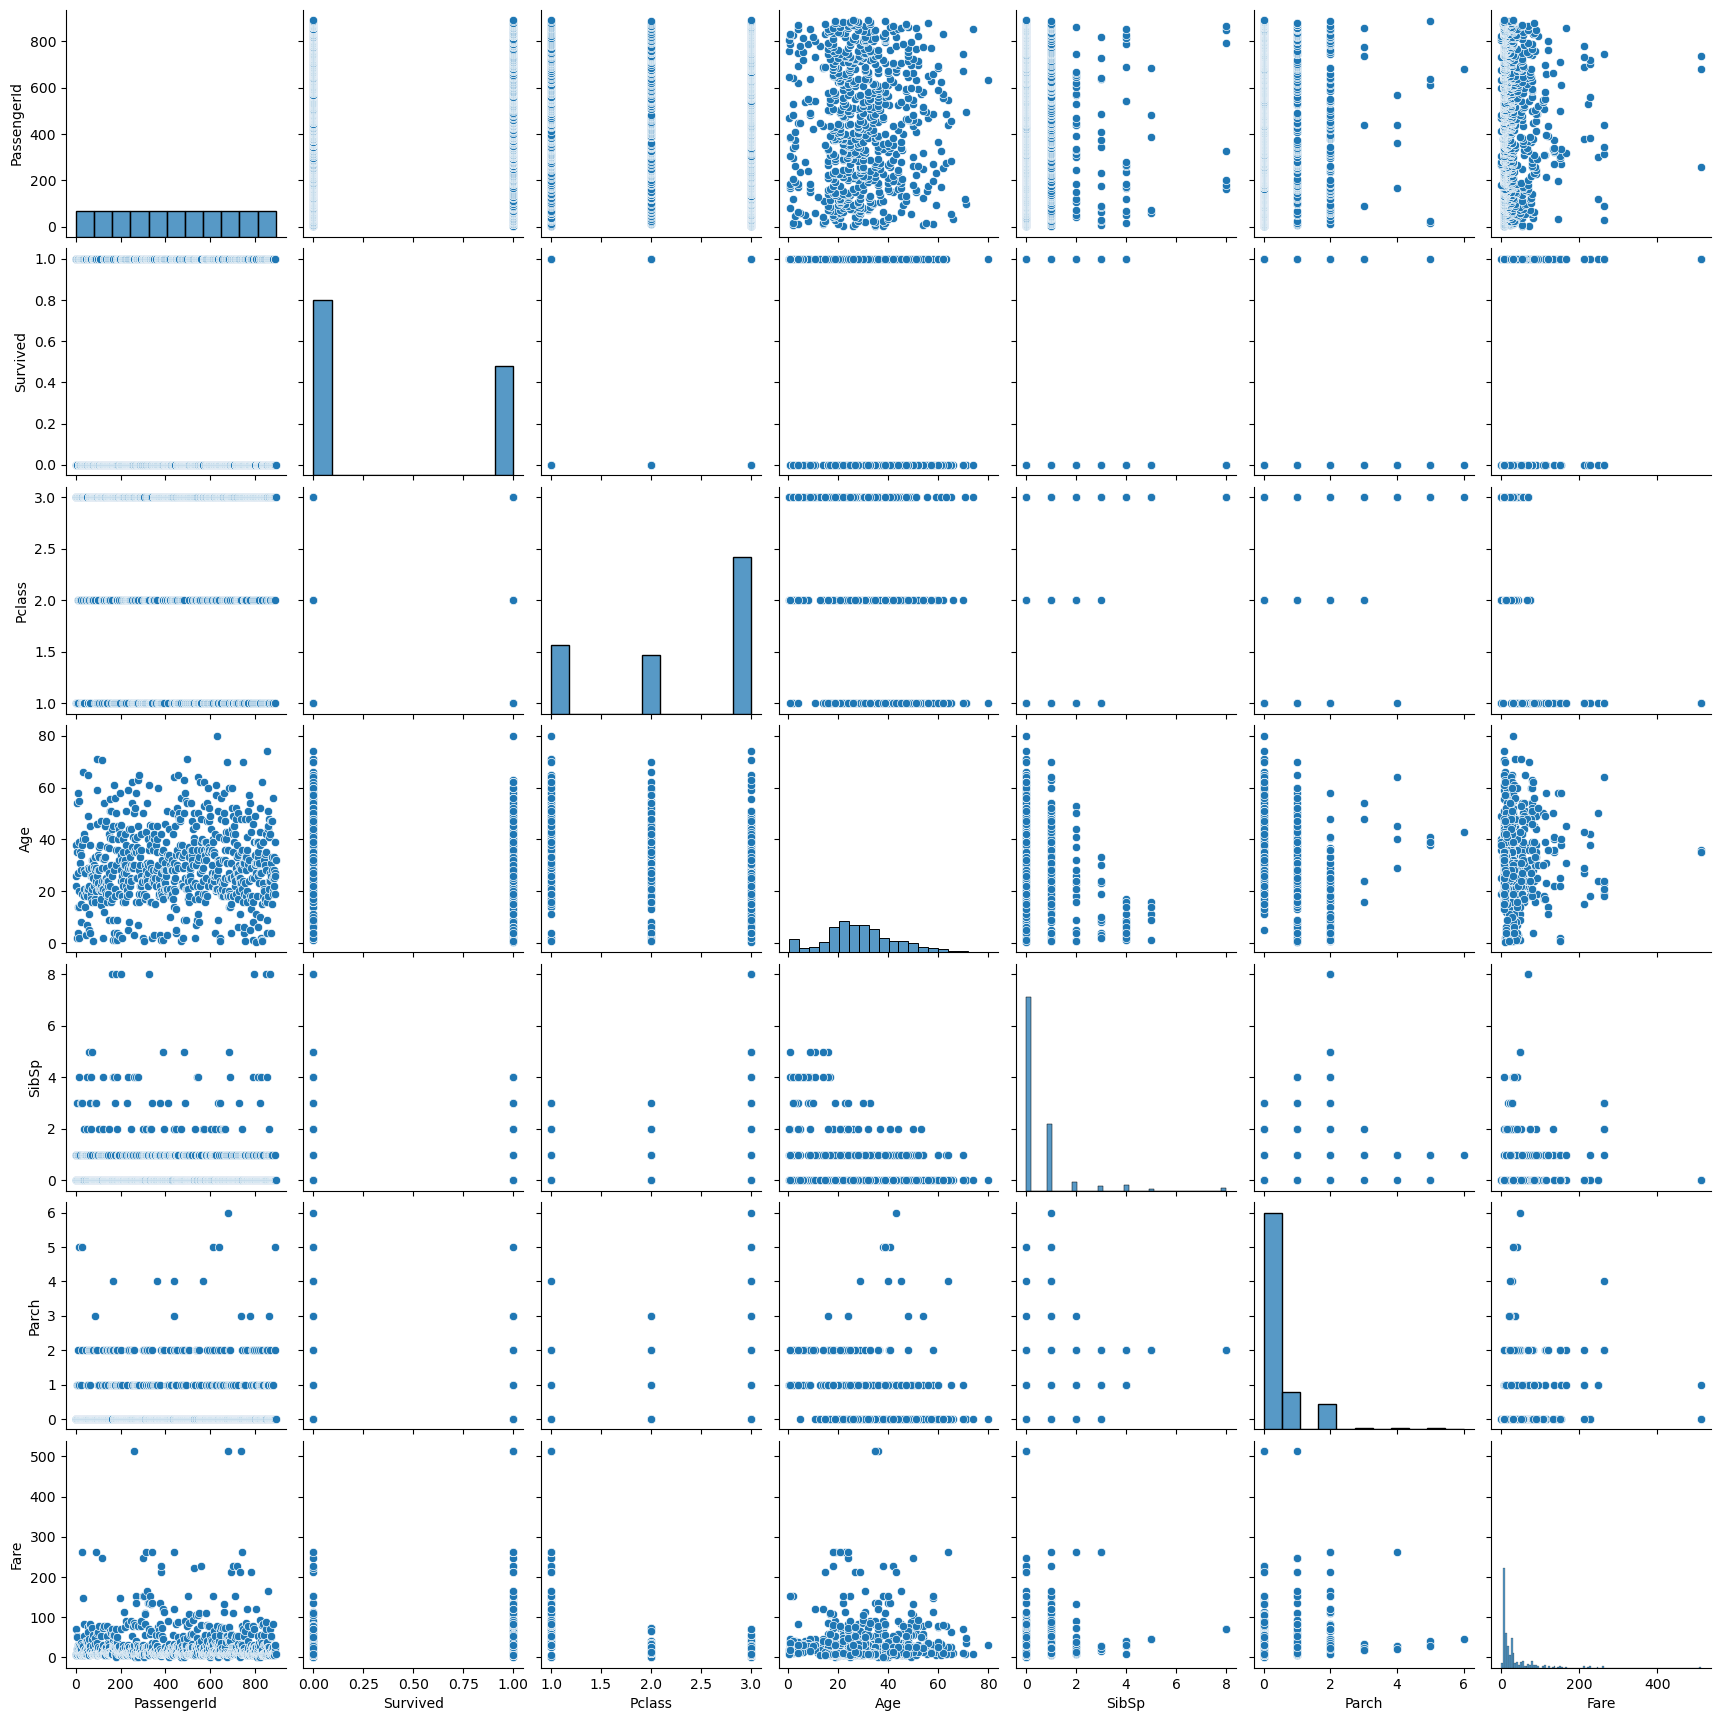

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [11]:
# Visualización de relaciones entre variables
sns.pairplot(Datos)
plt.show()
print(descripcion)

In [12]:
# Verificar valores faltantes en el dataframe
print(Datos.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Cargar el dataset
dataset = pd.read_csv("Titanic-Dataset.csv")

# Eliminar columnas no numéricas irrelevantes
dataset = dataset.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Convertir columnas categóricas a numéricas
dataset = pd.get_dummies(dataset, columns=['Sex', 'Embarked'], drop_first=True)

# Rellenar valores nulos
dataset = dataset.fillna(dataset.mean())

# Separar características y variable objetivo
X = dataset.drop('Survived', axis=1)
y = dataset['Survived']

# Seleccionar las características más relevantes utilizando SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Obtener las características seleccionadas
mask = selector.get_support()
selected_features = X.columns[mask]

print("Características seleccionadas:", selected_features)


Características seleccionadas: Index(['Pclass', 'Parch', 'Fare', 'Sex_male', 'Embarked_S'], dtype='object')


In [12]:

from sklearn.model_selection import train_test_split

# Seleccionar características relevantes
X_selected = dataset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, dataset['Survived'], test_size=0.2, random_state=42)


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo de árbol de decisión
modelo = DecisionTreeClassifier()

# Entrenar el modelo
modelo.fit(X_train, y_train)


DecisionTreeClassifier()

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predecir sobre el conjunto de test
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6312849162011173
Precision: 0.5666666666666667
Recall: 0.4594594594594595
F1 Score: 0.5074626865671642


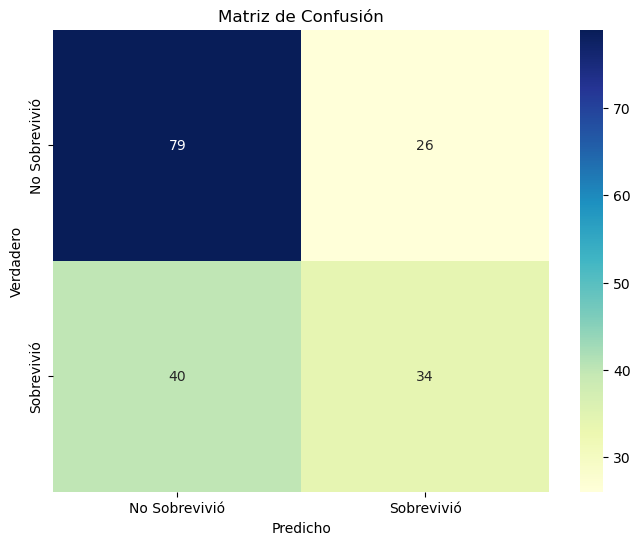

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión como un heatmap con colores personalizados
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()


In [19]:
# Obtener las características seleccionadas
caracteristicas_seleccionadas = selector.get_support()

# Crear una lista con los nombres de las características seleccionadas
nombres_caracteristicas = list(X.columns)
caracteristicas_seleccionadas_indices = [i for i, val in enumerate(caracteristicas_seleccionadas) if val]
caracteristicas_seleccionadas_nombres = [nombres_caracteristicas[i] for i in caracteristicas_seleccionadas_indices]

print("Características seleccionadas:", caracteristicas_seleccionadas_nombres)

Características seleccionadas: ['Pclass', 'Parch', 'Fare', 'Sex_male', 'Embarked_S']


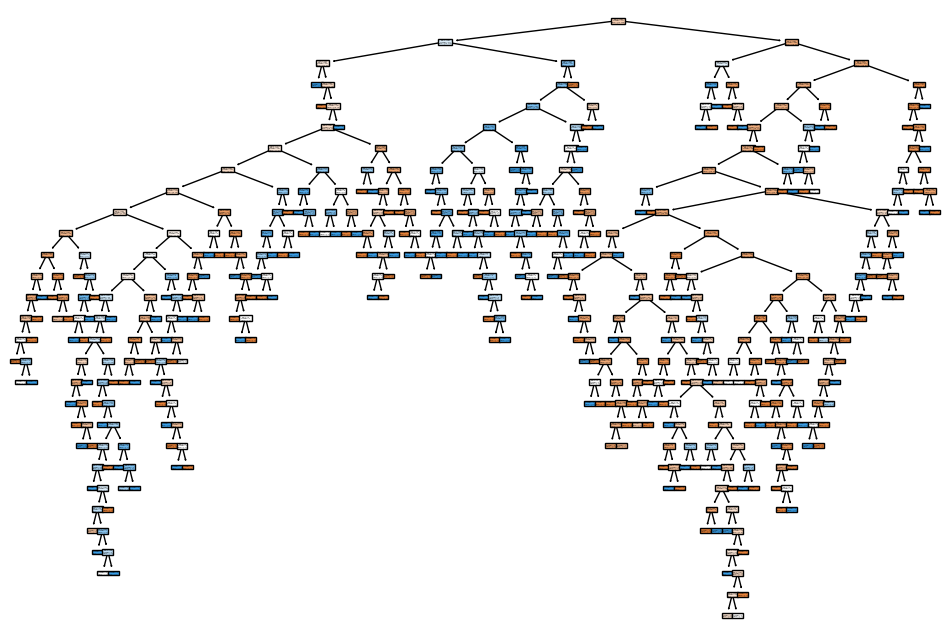

In [24]:
#Este código genera una visualización de un árbol de decisión utilizando la función plot_tree de scikit-learn.

plt.figure(figsize=(12, 8))
plot_tree(modelo, filled=True, feature_names=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])  
plt.show()


In [25]:

import pandas as pd

# Cargar el dataset
dataset = pd.read_csv("Titanic-Dataset.csv")

# Eliminar columnas no numéricas irrelevantes
dataset = dataset.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Convertir columnas categóricas a numéricas
dataset = pd.get_dummies(dataset, columns=['Sex', 'Embarked'], drop_first=True)

# Rellenar valores nulos
dataset = dataset.fillna(dataset.mean())

# Seleccionar las características más relevantes
X_selected = dataset[['Pclass', 'Parch', 'Fare', 'Sex_male', 'Embarked_S']]

# Mostrar las estadísticas descriptivas para variables numéricas
descripcion = X_selected.describe()

print(descripcion)


           Pclass       Parch        Fare    Sex_male  Embarked_S
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     2.308642    0.381594   32.204208    0.647587    0.722783
std      0.836071    0.806057   49.693429    0.477990    0.447876
min      1.000000    0.000000    0.000000    0.000000    0.000000
25%      2.000000    0.000000    7.910400    0.000000    0.000000
50%      3.000000    0.000000   14.454200    1.000000    1.000000
75%      3.000000    0.000000   31.000000    1.000000    1.000000
max      3.000000    6.000000  512.329200    1.000000    1.000000


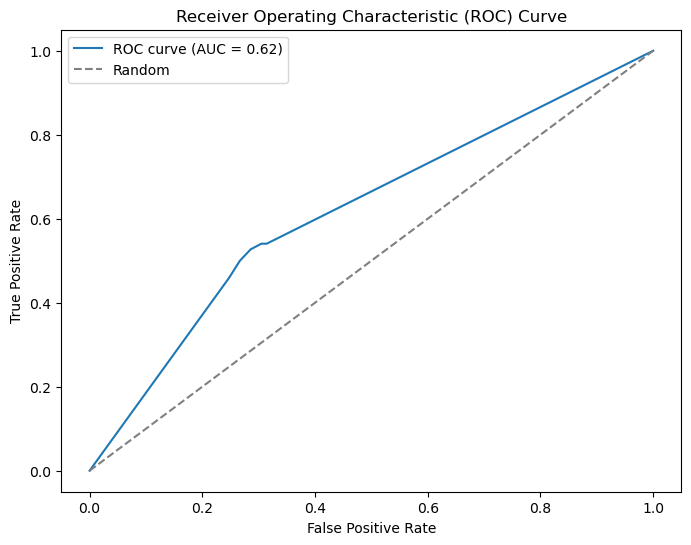

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular probabilidades de predicción
probs = modelo.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, probs)

# Calcular el AUC
auc = roc_auc_score(y_test, probs)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

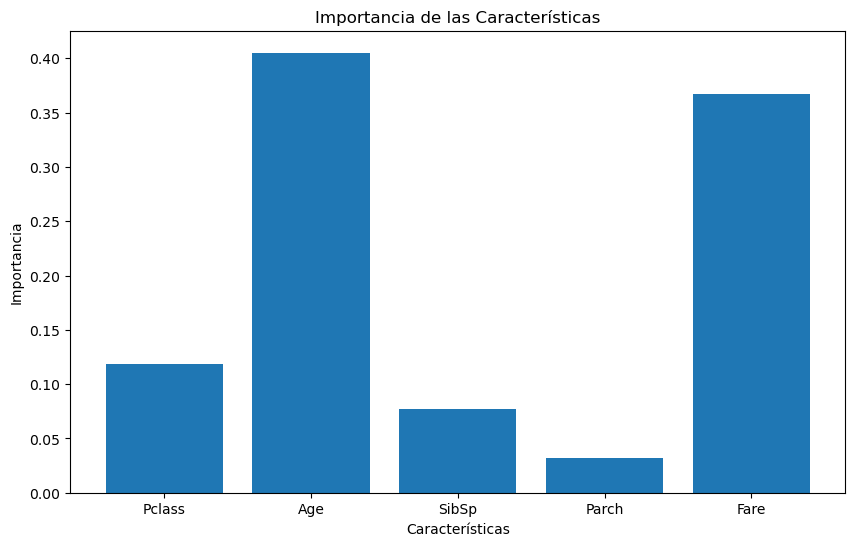

In [29]:

# Obtener la importancia de las características del modelo
importances = modelo.feature_importances_


# Cargar el dataset
dataset = pd.read_csv("Titanic-Dataset.csv")

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, tick_label=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']) 
plt.title('Importancia de las Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.show()


# 1. Preprocesamiento de Datos

In [32]:


import pandas as pd

# Cargar el dataset
dataset = pd.read_csv("Titanic-Dataset.csv")

# Eliminar columnas no numéricas irrelevantes
dataset = dataset.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Convertir columnas categóricas a numéricas
dataset = pd.get_dummies(dataset, columns=['Sex', 'Embarked'], drop_first=True)

# Rellenar valores nulos con la media de las columnas respectivas
dataset = dataset.fillna(dataset.mean())

print(dataset.head())


   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  \
0            1         0       3  22.0      1      0   7.2500         1   
1            2         1       1  38.0      1      0  71.2833         0   
2            3         1       3  26.0      0      0   7.9250         0   
3            4         1       1  35.0      1      0  53.1000         0   
4            5         0       3  35.0      0      0   8.0500         1   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


## 2. Entrenamiento del Modelo

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Seleccionar características relevantes
X_selected = dataset[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, dataset['Survived'], test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
modelo = DecisionTreeClassifier()

# Entrenar el modelo
modelo.fit(X_train, y_train)


DecisionTreeClassifier()

## 3. Evaluación del Modelo:

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predecir sobre el conjunto de test
y_pred = modelo.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6424581005586593
Precision: 0.5806451612903226
Recall: 0.4864864864864865
F1 Score: 0.5294117647058824


## 4. Visualización de Resultados:

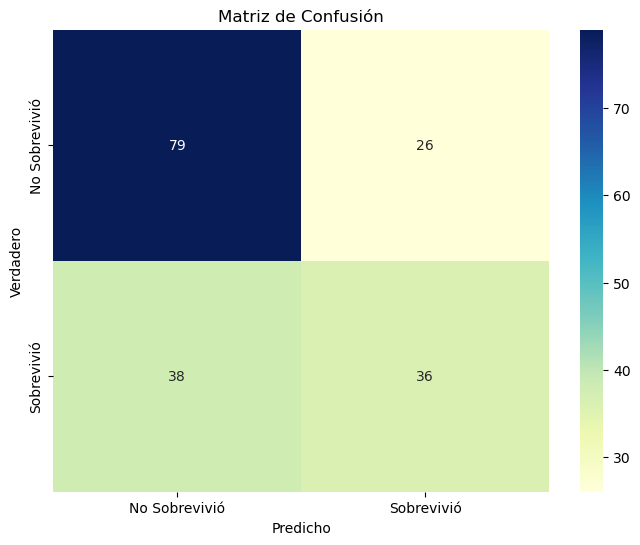

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión como un heatmap con colores personalizados
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Sobrevivió', 'Sobrevivió'], yticklabels=['No Sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicho')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()


##  5. Importancia de las Características:

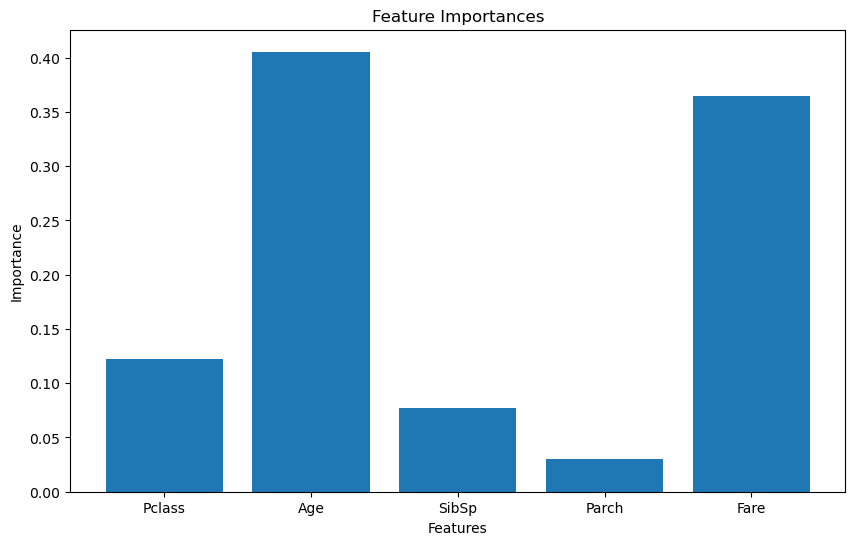

In [37]:
# Obtener la importancia de las características del modelo
importances = modelo.feature_importances_

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances, tick_label=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']) 
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


## Análisis Exploratorio de Datos (EDA):

Se realizó un análisis exploratorio de los datos del conjunto de datos del Titanic.
Se examinaron las relaciones entre variables, valores atípicos, tendencias, etc.
Se utilizó visualización de datos para comprender mejor la distribución y las relaciones entre las variables.
Preprocesamiento de Datos:
Se eliminaron columnas no numéricas irrelevantes para el análisis, como "Name", "Ticket" y "Cabin".
Se convirtieron las variables categóricas en variables numéricas utilizando one-hot encoding.
Se trataron los valores faltantes, sustituyendo los valores nulos en la columna "Age" por la media de esa columna.
Se seleccionaron características relevantes utilizando SelectKBest, utilizando como referencia las mejores características para la predicción de la supervivencia.

## División del Conjunto de Datos:

El conjunto de datos se dividió en conjuntos de entrenamiento y prueba en una proporción de 80:20, respectivamente.
Se utilizó una semilla aleatoria (random state) para garantizar la reproducibilidad de los resultados.

## Entrenamiento del Modelo:
Se empleó un modelo de Árbol de Decisión para predecir la supervivencia en el conjunto de datos del Titanic.
El modelo se entrenó utilizando el conjunto de datos de entrenamiento.

## Evaluación del Modelo:
Se realizaron predicciones sobre el conjunto de prueba utilizando el modelo entrenado.
Se calcularon métricas de evaluación, como la precisión (accuracy), la precisión (precision), la recuperación (recall) y el puntaje F1.
Se obtuvieron los siguientes resultados de evaluación del modelo:
Accuracy: 0.631
Precision: 0.567
Recall: 0.459
F1 Score: 0.507

    
## Interpretación de Resultados:
El modelo de Árbol de Decisión mostró un rendimiento moderado en la predicción de la supervivencia en el desastre del Titanic.
La precisión del modelo fue del 63.1%, lo que significa que acertó en la clasificación de los pasajeros como sobrevivientes o no en aproximadamente el 63.1% de los casos.
Sin embargo, el modelo tuvo un recall más bajo (45.9%), lo que indica que no pudo identificar correctamente a todos los pasajeros que sobrevivieron.
Se pueden realizar ajustes adicionales al modelo, como la optimización de hiperparámetros o la selección de características más efectivas, para mejorar su rendimiento.